In [1]:
# change to True if you use Google Colaboratory:
GoogleColaboratory = False

In [2]:
import os, sys, importlib

if GoogleColaboratory :

    !pip3 install healpy
    
    user = "mahlers77"
    repo = "KSETA2023"

    if os.path.isdir(repo):
        !rm -rf {repo}

    !git clone https://github.com/{user}/{repo}.git

    if not repo in sys.path:
        sys.path.insert(1, repo)

else :
    repo = "."

#for path in sys.path : 
#  print(path)

In [3]:
%matplotlib inline
import numpy as np
import healpy as H
from pylab import *
import matplotlib.pyplot as plt
from scipy.special import erf

In [4]:
nside = 32
npix = H.nside2npix(nside)

RUNS = 1000
Ntot = 100

C1 = []

for run in range(0,RUNS) :
    
    map = np.zeros(npix,dtype=int)

    for i in range(0,Ntot) :
        phitemp = np.random.rand()*2*np.pi
        x = np.random.rand()
    
        # dipole anisotropy :
        ani = 0.9
        #costhetatemp = (1.-np.sqrt(1.0+2.*ani+ani**2-4.*ani*x))/ani

        #isotropic :
        costhetatemp = 2.0*x-1.0
    
        thetatemp = np.arccos(costhetatemp)
    
        pixel = H.ang2pix(nside,thetatemp,phitemp)
        map[pixel] += 1.0

    map = map/(1.*Ntot)
    
    LMAX = 30
    
    out = H.anafast(map,alm=True,lmax=LMAX)	
    
    C1.append(out[0][1]/out[0][0])

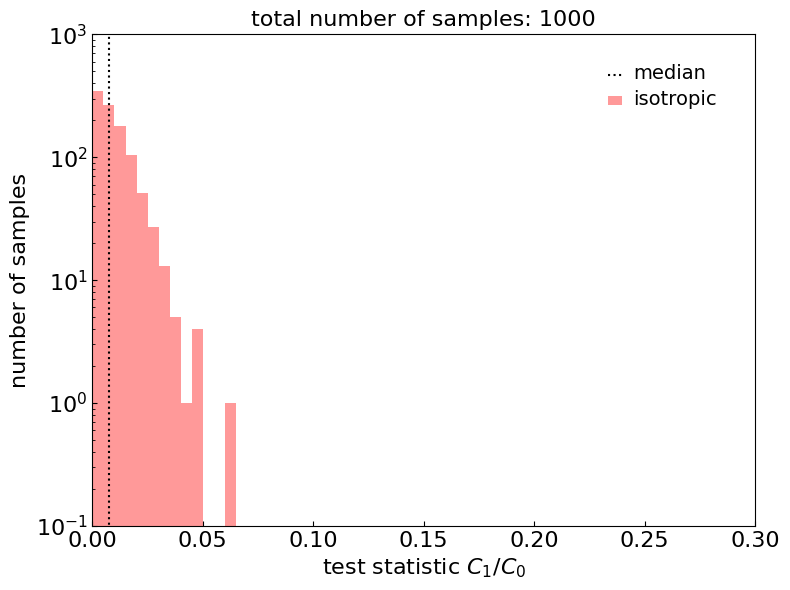

In [5]:
NKS = 60
delta = 0.005

# plot histograms of simulation

fig = figure(dpi=100,tight_layout=True,figsize=(8, 6))
ax = fig.add_subplot(1,1,1)

xlim([0,0.3])
ylim([0.1,RUNS])

title(r'total number of samples: ' + str(RUNS),fontsize=16)
xlabel(r'test statistic $C_1/C_0$',fontsize=16)
ylabel(r'number of samples',fontsize=16)
ax.tick_params(axis='both',which='both',direction='in')

for tick in ax.xaxis.get_major_ticks() :
    tick.label.set_fontsize(16) 

for tick in ax.yaxis.get_major_ticks() :
    tick.label.set_fontsize(16)  
    
plt.hist(C1,bins=np.arange(0,NKS*delta,delta),log=True,alpha=0.4,color="red",label=r'isotropic')

med = np.median(C1)
plt.plot(np.array([med,med]),np.array([0.01,RUNS]),color="black",linestyle="dotted",label=r'median')

leg = plt.legend(bbox_to_anchor=(0.95, 0.95), loc=1, borderaxespad=0.,fancybox=False,\
                 framealpha=0.0,frameon=True,numpoints=1, scatterpoints = 1,handlelength=1)
for t in leg.get_texts() :
    t.set_fontsize(14)

plt.show()